**Homework is done by the student of group 331 Ryakhovskiy Aleksey**

# Imports, loading and spliting data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import warnings

warnings.filterwarnings('ignore')

In [4]:
all_data = pd.read_csv('datasets/forest_dataset.csv')

In [5]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [6]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

# Fitting logistic regression with the best parameters

In [8]:
clf = LogisticRegression(solver='saga')

param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')
search.fit(train_feature_matrix, train_labels)
clf_logregr = search.best_estimator_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [12]:
clf = KNeighborsClassifier()

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [18]:
params = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's output the best parameters

In [20]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [22]:
optimal_clf = clf_grid.best_estimator_
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

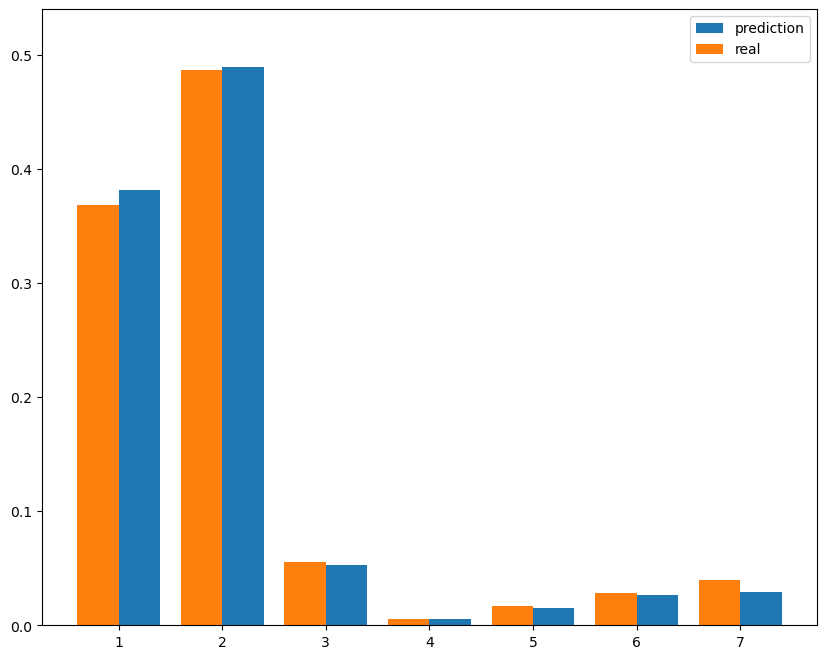

In [23]:
unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

In [26]:
accuracy_score(optimal_clf.predict(test_feature_matrix), test_labels)

0.785

The quality of the model is 0.785 (in terms of accuracy_score), which is not bad overall, especially when you look at the graph above.

In [28]:
accuracy_score(clf_logregr.predict(test_feature_matrix), test_labels)

0.624

**The KNN model is better than logistic regression on this dataset** (accuracy_score 0.785 vs. 0.624) because it better captures non-linear patterns and adapts locally to the data. Logistic regression, assuming linear separability, struggles with this dataset’s complexity, making k-NN a better fit, though it may be less interpretable and more computationally intensive.

**Pros of KNN:**

* Simplicity: Easy to understand and implement, requiring no explicit training phase beyond storing the data.
* Non-parametric: Makes no assumptions about the data distribution, making it flexible for non-linear relationships.
* Adaptability: Locally adapts to the data, capturing complex patterns based on proximity.
* Versatility: Can be used for both classification and regression tasks.

**Cons of KNN:**

* Computational Cost: High memory and time complexity during prediction (O(n) for each query), as it calculates distances to all training points.
* Sensitivity to Scale: Features with different scales can distort distance calculations, requiring normalization or standardization.
* Noise Sensitivity: Outliers or noisy data points can significantly affect predictions, as they influence the nearest neighbors.
* Choice of k: The performance heavily depends on selecting an appropriate k; too small or too large values can lead to overfitting or underfitting.
* Curse of Dimensionality: Performance degrades in high-dimensional spaces due to the sparsity of data, making distances less meaningful.

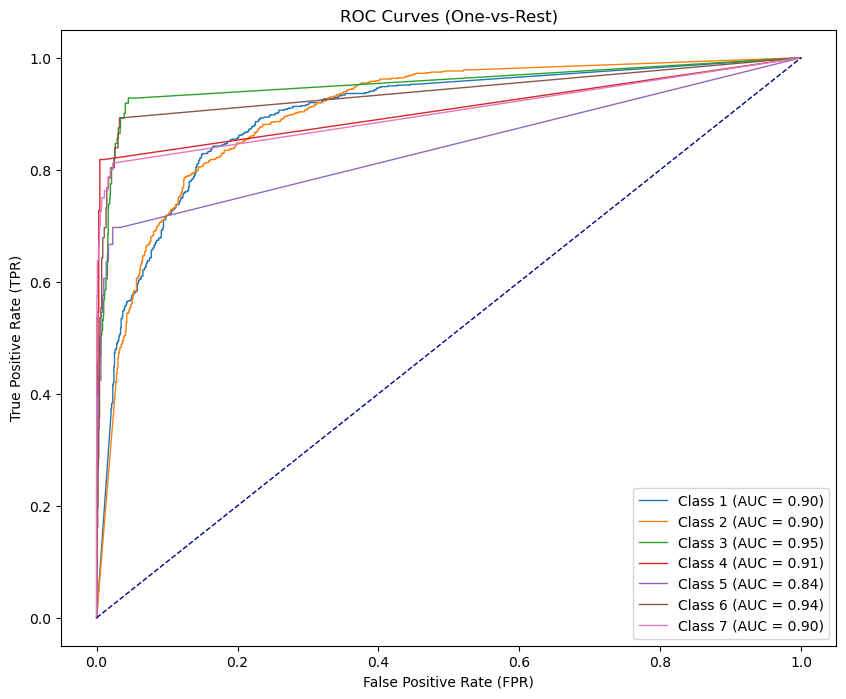

In [31]:
plt.figure(figsize=(10, 8))

for i in range(7):
    fpr, tpr, _ = roc_curve(test_labels==i+1, pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()